<a href="https://colab.research.google.com/github/minhe8564/Assignment/blob/main/Machine-learning/231204_Basecode_KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors (KNN)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Dataset

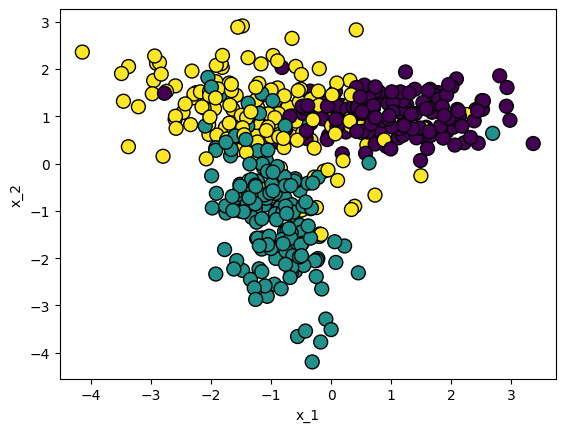

In [5]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=3,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [6]:
# Training/Testing Dataset 분리 (80:20), 임의
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))

Training samples:  400
Testing samples:  100


## Model
KNN은 Model 기반으로 활동하지 않음

In [7]:
def L2_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k=3):
    # initialization
    # weight, bias 저장하지 않고, k만 저장
    self.k = k

  def fit(self, X, y):
    # Storage training datas
    # GD 사용하지 않고, 입력으로 받은 training data set 저장
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    # Prediction
    y_pred = []

    # X data 여러개 들어올 수도 있음
    for X_i in X:
      distance = [L2_distance(X_i, X_train_i) for X_train_i in self.X_train]

      # 최솟값이 되는 k index distance
      k_idx = np.argsort(distance) [:self.k]
      k_labels = [self.y_train[i] for i in k_idx]

      # labels 안에 가장 많은 class
      most_class = max(k_labels, key = k_labels.count)
      y_pred.append(most_class)

    return y_pred

## Prediction

In [8]:
model = KNN()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 정답률
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.81


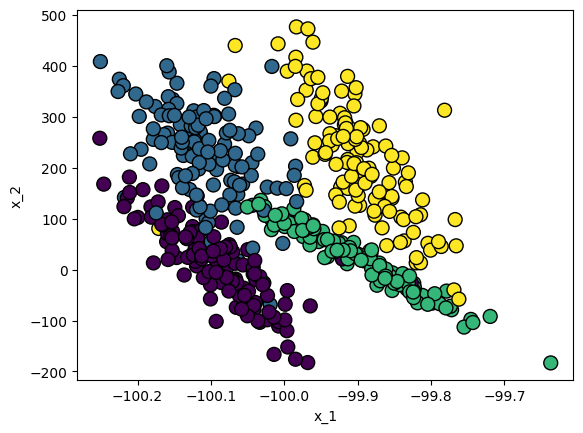

In [9]:
# 데이터 시각화 추가
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=4,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

X[:, 0] = X[:, 0] * 0.1 -100
X[:, 1] = X[:, 1] * 100 + 120

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()